## Summary
TODO install explain code here

Install necessary libraries 

In [1]:
!pip3 install matplotlib
!pip3 install numpy
!pip3 instal torch

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
ERROR: unknown command "instal" - maybe you meant "install"


The function third_degree_polynomial will return the output of a third degree polynomial.
The arguments are the input vector x and the coefficient vector.

In [2]:
def third_degree_polynomial(x, coefficient_vector):
    x_2 = np.multiply(x, x)
    x_3 = np.multiply(x_2, x)
    return  coefficient_vector[0] + np.multiply(coefficient_vector[1], x)\
          + np.multiply(coefficient_vector[2], x_2) + np.multiply(coefficient_vector[3], x_3)

Generate the data we will use for regression

In [3]:
# coefficients vector
coefficients = np.array([1, -2, 3, -1]).T

# Training data
x_train = np.expand_dims(np.arange(0, 2, 0.1), axis=1)
y_train = third_degree_polynomial(x_train, coefficients)

# Testing data
x_test = np.expand_dims(np.arange(0, 2, 0.01), axis=1)
y_test = third_degree_polynomial(x_test, coefficients)

# Add noise
np.random.seed(1)
y_train = y_train + 0.2 * np.random.normal(size=y_train.shape)
y_test = y_test + 0.2 * np.random.normal(size=y_test.shape)

A plot of the generated test data for visualization

Text(0, 0.5, 'Output (y)')

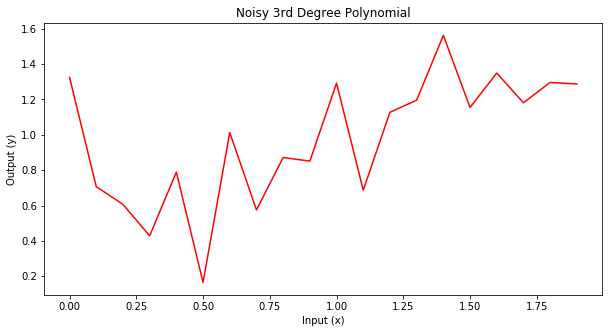

In [4]:
plt.figure(figsize=(10,5))
plt.plot(x_train, y_train, 'r')
plt.title('Noisy 3rd Degree Polynomial')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')

Fit the data using a closed form solution.
Where degree specifies the polynomial to fit, inputs is the vector x,
and targets is the expected outputs.

In [5]:
def fit(degree, inputs, targets):
    design_matrix = np.ones(inputs.shape)
    for i in range(1, degree + 1):
        design_matrix = np.column_stack([design_matrix, np.power(inputs, i)])
        
    return np.linalg.inv(design_matrix.T@design_matrix)@design_matrix.T@targets

We will define a function any degree polynomial that taxes and input vector x and a coefficient vector
and output the value of the polynomial.

In [6]:
def any_degree_polynomial(x, coefficient_vector):
    degree = coefficient_vector.shape[0]
    polynomial = np.ones(x.shape) * coefficient_vector[0]
    
    for i in range(1, degree):
        polynomial += np.multiply(coefficient_vector[i], np.power(x, i))
    
    return polynomial


We want to compare our fit with the training data (ground truth).
We will define the mean squared error

In [7]:
def mean_squared_error(predicted_values, targets):
    return (np.square(predicted_values - targets)).mean()

Next we are going to fit our data with different degree polynomial and see how the training
and test error change as we increase the model capacity.

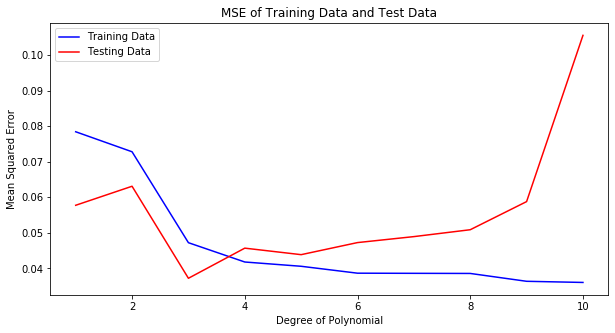

In [8]:
degrees = np.arange(1, 11, 1)
weights = []
train_pred_dictionary = {}
test_pred_dictionary = {}
train_mse = []
test_mse = []
for degree in degrees:
    # Train and store weights
    weights = fit(degree, x_train, y_train)
    
    # Training Data Prediction
    train_prediction = any_degree_polynomial(x_train, weights)
    train_pred_dictionary[degree] = train_prediction
    train_mse.append(mean_squared_error(train_prediction, y_train))
    # Test Data Prediction
    test_prediction = any_degree_polynomial(x_test, weights)
    test_mse.append(mean_squared_error(test_prediction, y_test))

# Plot training and testing data
plt.figure(figsize=(10,5))
plt.plot(degrees, train_mse, 'b', degrees, test_mse, 'r')
plt.legend(['Training Data', 'Testing Data'])
plt.title('MSE of Training Data and Test Data')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error');  

Let's look at the linear fit, the 10th degree fit, and a third degree fit compared to the data

Text(0, 0.5, 'Output (y)')

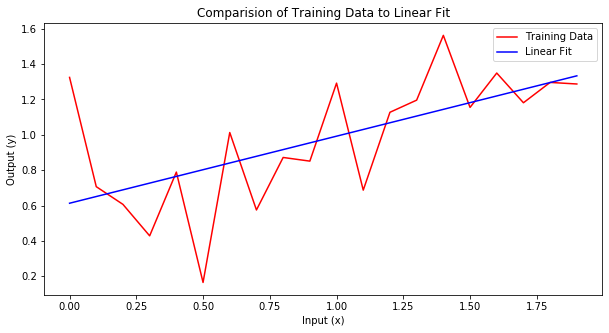

In [9]:
plt.figure(figsize=(10,5))
plt.plot(x_train, y_train, 'r', x_train, train_pred_dictionary[1], 'b')
plt.legend(['Training Data', 'Linear Fit'])
plt.title('Comparision of Training Data to Linear Fit')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')


Text(0, 0.5, 'Output (y)')

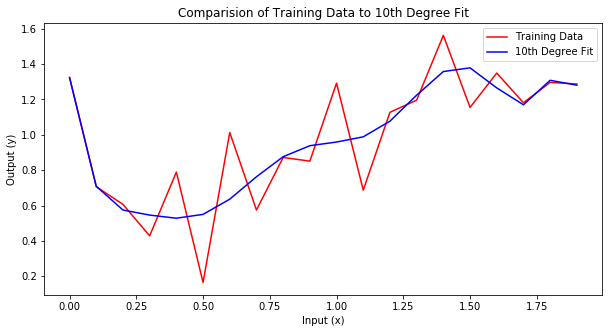

In [10]:
plt.figure(figsize=(10,5))
plt.plot(x_train, y_train, 'r', x_train, train_pred_dictionary[10], 'b')
plt.legend(['Training Data', '10th Degree Fit'])
plt.title('Comparision of Training Data to 10th Degree Fit')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')

Text(0, 0.5, 'Output (y)')

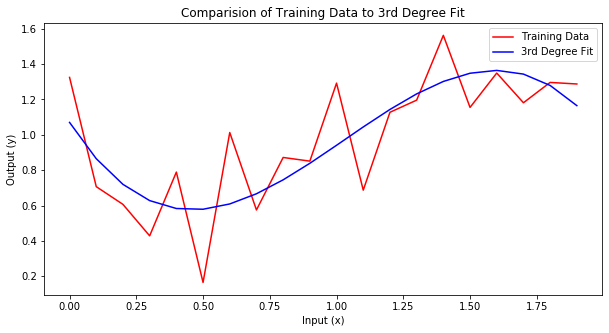

In [11]:
plt.figure(figsize=(10,5))
plt.plot(x_train, y_train, 'r', x_train, train_pred_dictionary[3], 'b')
plt.legend(['Training Data', '3rd Degree Fit'])
plt.title('Comparision of Training Data to 3rd Degree Fit')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')


